 # Chapter 3

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astroML

We present here the figure 3.2 in its original form in the book

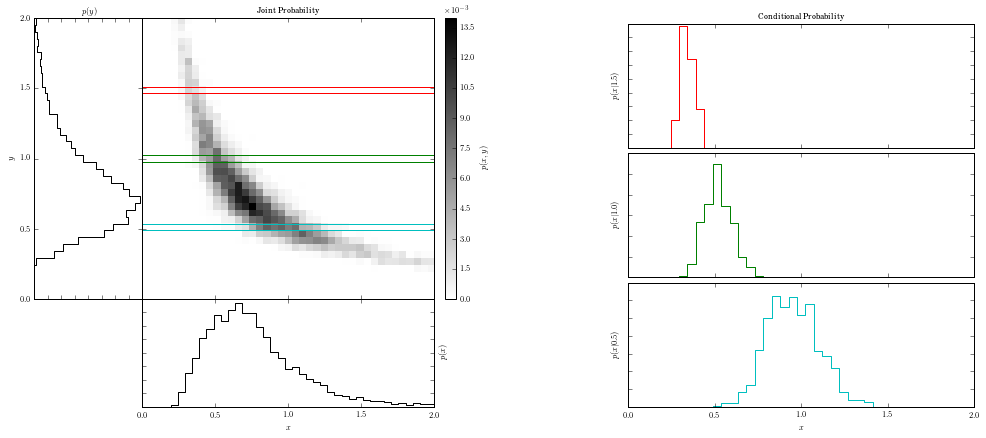

In [3]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

def banana_distribution(N=10000):
    """This generates random points in a banana shape"""
    # create a truncated normal distribution
    theta = np.random.normal(0, np.pi / 8, 10000)
    theta[theta >= np.pi / 4] /= 2
    theta[theta <= -np.pi / 4] /= 2
    # define the curve parametrically
    r = np.sqrt(1. / abs(np.cos(theta) ** 2 - np.sin(theta) ** 2))
    r += np.random.normal(0, 0.08, size=10000)
    x = r * np.cos(theta + np.pi / 4)
    y = r * np.sin(theta + np.pi / 4)
    return (x, y)


#------------------------------------------------------------
# Generate the data and compute the normalized 2D histogram
np.random.seed(1)
x, y = banana_distribution(10000)

Ngrid = 41
grid = np.linspace(0, 2, Ngrid + 1)

H, xbins, ybins = np.histogram2d(x, y, grid)
H /= np.sum(H)

#------------------------------------------------------------
# plot the result
fig = plt.figure(figsize=(15, 7.5)) ## We multiplied times 3 the size in both x and y axes to make it look bigger

# define axes
ax_Pxy = plt.axes((0.2, 0.34, 0.27, 0.52))
ax_Px = plt.axes((0.2, 0.14, 0.27, 0.2))
ax_Py = plt.axes((0.1, 0.34, 0.1, 0.52))
ax_cb = plt.axes((0.48, 0.34, 0.01, 0.52))
ax_Px_y = [plt.axes((0.65, 0.62, 0.32, 0.23)),
           plt.axes((0.65, 0.38, 0.32, 0.23)),
           plt.axes((0.65, 0.14, 0.32, 0.23))]

# set axis label formatters
ax_Px_y[0].xaxis.set_major_formatter(NullFormatter())
ax_Px_y[1].xaxis.set_major_formatter(NullFormatter())

ax_Pxy.xaxis.set_major_formatter(NullFormatter())
ax_Pxy.yaxis.set_major_formatter(NullFormatter())

ax_Px.yaxis.set_major_formatter(NullFormatter())
ax_Py.xaxis.set_major_formatter(NullFormatter())

# draw the joint probability
plt.axes(ax_Pxy)
H *= 1000
plt.imshow(H, interpolation='nearest', origin='lower', aspect='auto',
           extent=[0, 2, 0, 2], cmap=plt.cm.binary)

cb = plt.colorbar(cax=ax_cb)
cb.set_label('$p(x, y)$')
plt.text(0, 1.02, r'$\times 10^{-3}$',
         transform=ax_cb.transAxes)

# draw p(x) distribution
ax_Px.plot(xbins[1:], H.sum(0), '-k', drawstyle='steps')

# draw p(y) distribution
ax_Py.plot(H.sum(1), ybins[1:], '-k', drawstyle='steps')

# define axis limits
ax_Pxy.set_xlim(0, 2)
ax_Pxy.set_ylim(0, 2)
ax_Px.set_xlim(0, 2)
ax_Py.set_ylim(0, 2)

# label axes
ax_Pxy.set_xlabel('$x$')
ax_Pxy.set_ylabel('$y$')
ax_Px.set_xlabel('$x$')
ax_Px.set_ylabel('$p(x)$')
ax_Px.yaxis.set_label_position('right')
ax_Py.set_ylabel('$y$')
ax_Py.set_xlabel('$p(y)$')
ax_Py.xaxis.set_label_position('top')


# draw marginal probabilities
iy = [3 * Ngrid / 4, Ngrid / 2, Ngrid / 4]
colors = 'rgc'
axis = ax_Pxy.axis()
for i in range(3):
    # overplot range on joint probability
    ax_Pxy.plot([0, 2, 2, 0],
                [ybins[iy[i] + 1], ybins[iy[i] + 1],
                 ybins[iy[i]], ybins[iy[i]]], c=colors[i], lw=1)
    Px_y = H[iy[i]] / H[iy[i]].sum()
    ax_Px_y[i].plot(xbins[1:], Px_y, drawstyle='steps', c=colors[i])
    ax_Px_y[i].yaxis.set_major_formatter(NullFormatter())
    ax_Px_y[i].set_ylabel('$p(x | %.1f)$' % ybins[iy[i]])
ax_Pxy.axis(axis)

ax_Px_y[2].set_xlabel('$x$')

ax_Pxy.set_title('Joint Probability')
ax_Px_y[0].set_title('Conditional Probability')

plt.show()

Now we repeat the plot with seaborn

/Users/nobleWkennamer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nobleWkennamer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


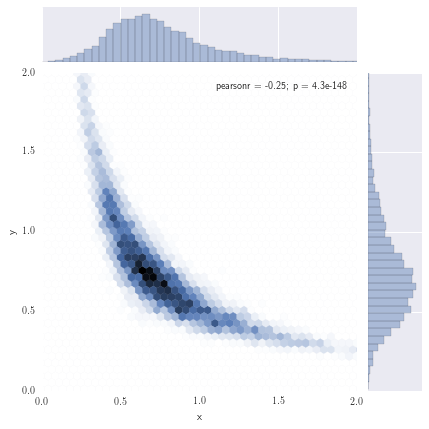

In [4]:
import seaborn as sns
import pandas as pd
data = (x,y)
data = np.array(data)
data = data.T
df = pd.DataFrame(data, columns=["x", "y"])
g = sns.jointplot(x="x", y="y",data=df, kind="hex", marginal_kws={"bins":41*41/2}, gridsize=41*41/2, xlim=(0,2), ylim=(0,2))

In [5]:
cond1 = (y>=0.5-2./41.) & (y<=0.5+2./41.)
cond2 = (y>=1.0-2./41.) & (y<=1.0+2./41.)
cond3 = (y>=1.5-2./41.) & (y<=1.5+2./41.)

In [6]:
sns.__version__

'0.6.0'

In [7]:
weights = np.ones(10000)*1./10000.

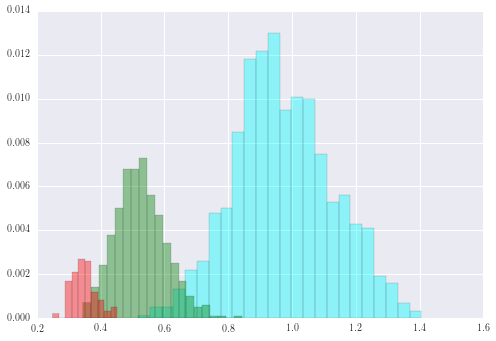

In [8]:
g1 = sns.distplot(x[cond1],hist=True, color='cyan', kde=False, hist_kws={'weights':weights[cond1]})
g2 = sns.distplot(x[cond2],hist=True, color='green', kde=False, hist_kws={'weights':weights[cond2]})
g3 = sns.distplot(x[cond3],hist=True, color='red', kde=False, hist_kws={'weights':weights[cond3]})

 ## Monty Hall problem

We will simulate the Monty Hall problem where you pick one out of three boxes, the host eliminates one of the boxes (knowing the one that has the prize) and we want to see what is the probability of winning by keeping the first choice or by changing the choice

In [9]:
orig_choice = np.random.random_integers(1,3,size=10000)
correct_choice = np.random.random_integers(1,3,size=10000)
change_mind = np.zeros(10000)
host_choice = np.zeros(10000)
choice = [1,2,3]
for i in range(0,10000):
    if(orig_choice[i]==correct_choice[i]):
        host_choice[i]=choice[correct_choice[i]-2]
    else:
        host_choice[i]=6-correct_choice[i]-orig_choice[i]
    change_mind[i]=6-orig_choice[i]-host_choice[i]
[x]=np.where(change_mind==correct_choice)
[y]=np.where(orig_choice==correct_choice)
print len(x)/10000., len(y)/10000.

0.6682 0.3318


 ## Plots with Bokeh

In [10]:
from ipywidgets import interact
from bokeh.io import push_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import output_notebook

In [11]:
output_notebook()

BokehJS successfully loaded.

We are going to take advantage of the interactivity of Bokeh to plot several distributions presented along the chapter 3

In [12]:
from scipy import stats
xd = np.linspace(0,10,100)
dist = stats.norm(0,1)
yd=dist.pdf(xd)
pp = figure(title="Probability distribution plot", plot_height=300, plot_width=600, y_range=(0.05,1.05))
rr = pp.line(xd,yd,color="red",line_width=3)

In [13]:
def pdist(f,par1=0,par2=1):
    if f=="Gaussian": dist = stats.norm(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Uniform": dist = stats.uniform(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Binomial": dist = stats.binom(par1,par2); rr.data_source.data['y']=dist.pmf(xd)
    if f=="Poisson": dist = stats.poisson(par1); rr.data_source.data['y']=dist.pmf(xd)
    if f=="Cauchy": dist = stats.cauchy(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Laplace": dist = stats.laplace(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Chi2": dist = stats.chi2(par1); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Student t": dist = stats.t(par1); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Fisher f": dist = stats.f(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Beta": dist = stats.beta(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Gamma": dist = stats.gamma(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Weibull": dist = stats.dweibull(par1,0,par2); rr.data_source.data['y']=dist.pdf(xd)
    
    push_notebook()

In [14]:
show(pp)

In [15]:
interact(pdist,f=["Gaussian","Uniform","Binomial","Poisson","Cauchy","Chi2","Laplace","Student t","Fisher f","Beta","Gamma","Weibull"],par1=(0,10),par2=(0,10))

<function __main__.pdist>

In [16]:
nsamples = 10
x = np.random.uniform(size=nsamples)
xp = np.zeros(nsamples)
for i in range(0,nsamples):
    xp[i]=np.mean(x[0:i])-0.5
hist, edges = np.histogram(xp,bins=100, range=(-1,1))
p = figure(title="Central Limit Theorem interactive demo", plot_height=300, plot_width=600)
r = p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")

/Users/nobleWkennamer/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [17]:
def update(nsamples=1):
    np.random.seed(123)
    x = np.random.uniform(size=nsamples)
    xp = np.zeros(nsamples)
    for i in range(0,nsamples):
        xp[i]=np.mean(x[0:i])-0.5
    hist, edges = np.histogram(xp,bins=100, range=(-1,1))
    r.data_source.data['top']=hist
    push_notebook()

In [18]:
show(p)

In [19]:
interact(update,nsamples=(1,500))

<function __main__.update>

An example of better estimators than the mean for distributions with heavy tails.

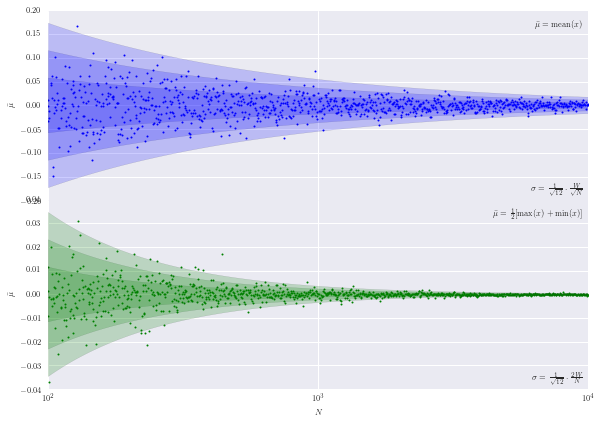

In [20]:

from scipy.stats import uniform

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate the random distribution
N = (10 ** np.linspace(2, 4, 1000)).astype(int)
mu = 0
W = 2
rng = uniform(mu - 0.5 * W, W)  # uniform distribution between mu-W and mu+W

#------------------------------------------------------------
# Compute the cumulative mean and min/max estimator of the sample
mu_estimate_mean = np.zeros(N.shape)
mu_estimate_minmax = np.zeros(N.shape)

for i in xrange(len(N)):
    x = rng.rvs(N[i])  # generate N[i] uniformly distributed values
    mu_estimate_mean[i] = np.mean(x)
    mu_estimate_minmax[i] = 0.5 * (np.min(x) + np.max(x))

# compute the expected scalings of the estimator uncertainties
N_scaling = 2. * W / N / np.sqrt(12)
root_N_scaling = W / np.sqrt(N * 12)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(hspace=0, bottom=0.15, left=0.15)

# upper plot: mean statistic
ax = fig.add_subplot(211, xscale='log')
ax.scatter(N, mu_estimate_mean, c='b', lw=0, s=4)

# draw shaded sigma contours
for nsig in (1, 2, 3):
    ax.fill(np.hstack((N, N[::-1])),
            np.hstack((nsig * root_N_scaling,
                       -nsig * root_N_scaling[::-1])), 'b', alpha=0.2)
ax.set_xlim(N[0], N[-1])
ax.set_ylim(-0.199, 0.199)
ax.set_ylabel(r'$\bar{\mu}$')
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.text(0.99, 0.95,
        r'$\bar\mu = \mathrm{mean}(x)$',
        ha='right', va='top', transform=ax.transAxes)
ax.text(0.99, 0.02,
        r'$\sigma = \frac{1}{\sqrt{12}}\cdot\frac{W}{\sqrt{N}}$',
        ha='right', va='bottom', transform=ax.transAxes)

# lower plot: min/max statistic
ax = fig.add_subplot(212, xscale='log')
ax.scatter(N, mu_estimate_minmax, c='g', lw=0, s=4)

# draw shaded sigma contours
for nsig in (1, 2, 3):
    ax.fill(np.hstack((N, N[::-1])),
            np.hstack((nsig * N_scaling,
                       -nsig * N_scaling[::-1])), 'g', alpha=0.2)
ax.set_xlim(N[0], N[-1])
ax.set_ylim(-0.0399, 0.0399)
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{\mu}$')

ax.text(0.99, 0.95,
        r'$\bar\mu = \frac{1}{2}[\mathrm{max}(x) + \mathrm{min}(x)]$',
        ha='right', va='top', transform=ax.transAxes)
ax.text(0.99, 0.02,
        r'$\sigma = \frac{1}{\sqrt{12}}\cdot\frac{2W}{N}$',
        ha='right', va='bottom', transform=ax.transAxes)

plt.show()

Here is an example of computing the components of a bivariate gaussian using a sample of 1000 data values with two levels of contamination. Figure 3.23.

The robust method implemented in astroML uses the robust estimator of the variance $\sigma_{G}$ and takes into account the correlation between parameters.

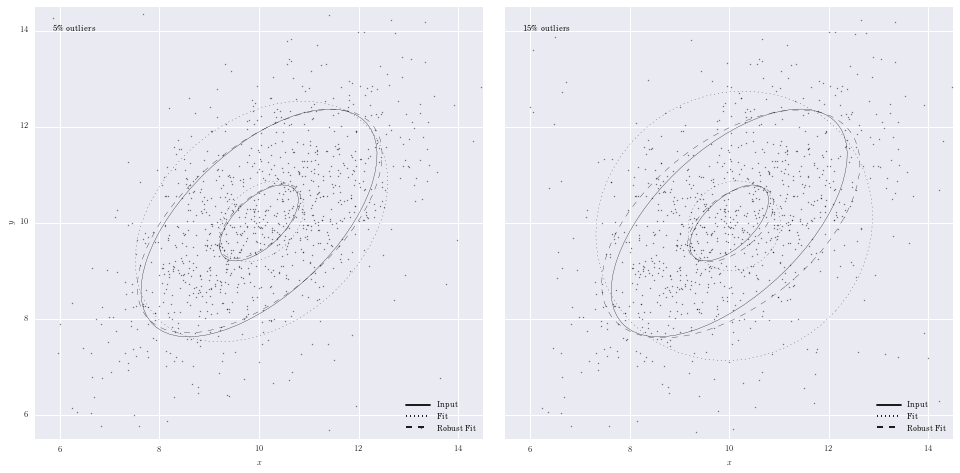

In [21]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats import fit_bivariate_normal
from astroML.stats.random import bivariate_normal

# percent sign needs to be escaped if usetex is activated
import matplotlib
if matplotlib.rcParams.get('text.usetex'):
    pct = r'\%'
else:
    pct = r'%'

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

N = 1000

sigma1 = 2.0
sigma2 = 1.0
mu = [10, 10]
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180

#------------------------------------------------------------
# Draw N points from a multivariate normal distribution
#
#   we use the bivariate_normal function from astroML.  A more
#   general function for this is numpy.random.multivariate_normal(),
#   which requires the user to specify the full covariance matrix.
#   bivariate_normal() generates this covariance matrix for the
#   given inputs

np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

#------------------------------------------------------------
# Create the figure showing the fits
fig = plt.figure(figsize=(15, 7.5)) ##3 times the original size
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.05,
                    bottom=0.15, top=0.95)


# We'll create two figures, with two levels of contamination
for i, f in enumerate([0.05, 0.15]):
    ax = fig.add_subplot(1, 2, i + 1)

    # add outliers distributed using a bivariate normal.
    X[:int(f * N)] = bivariate_normal((10, 10), 2, 4,
                                      45 * np.pi / 180., int(f * N))
    x, y = X.T

    # compute the non-robust statistics
    (mu_nr, sigma1_nr,
     sigma2_nr, alpha_nr) = fit_bivariate_normal(x, y, robust=False)

    # compute the robust statistics
    (mu_r, sigma1_r,
     sigma2_r, alpha_r) = fit_bivariate_normal(x, y, robust=True)

    # scatter the points
    ax.scatter(x, y, s=2, lw=0, c='k', alpha=0.5)

    # Draw elipses showing the fits
    for Nsig in [1, 3]:
        # True fit
        E = Ellipse((10, 10), sigma1 * Nsig, sigma2 * Nsig, alpha_deg,
                    ec='k', fc='none')
        ax.add_patch(E)

        # Non-robust fit
        E = Ellipse(mu_nr, sigma1_nr * Nsig, sigma2_nr * Nsig,
                    (alpha_nr * 180. / np.pi),
                    ec='k', fc='none', linestyle='dotted')
        ax.add_patch(E)

        # Robust fit
        E = Ellipse(mu_r, sigma1_r * Nsig, sigma2_r * Nsig,
                    (alpha_r * 180. / np.pi),
                    ec='k', fc='none', linestyle='dashed')
        ax.add_patch(E)

    ax.text(0.04, 0.96, '%i%s outliers' % (f * 100, pct),
            ha='left', va='top', transform=ax.transAxes)

    ax.set_xlim(5.5, 14.5)
    ax.set_ylim(5.5, 14.5)
    ax.set_xlabel('$x$')

    # This is a bit of a hack:
    # We'll draw some lines off the picture to make our legend look better
    ax.plot([0], [0], '-k', label='Input')
    ax.plot([0], [0], ':k', label='Fit')
    ax.plot([0], [0], '--k', label='Robust Fit')
    ax.legend(loc='lower right')

    if i == 0:
        ax.set_ylabel('$y$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

plt.show()

##Correlation Coefficients

This section discusses the strengths and weaknesses of three techniques to measure to the sample correlation coefficient.

1. Pearson
    * Measurement errors are not used
    * Sensitive to outliers
    * Measures linear relationship
    
2. Spearman
    * Based on ranks (exactly Pearsons but on the ranks instead of the actual data).
    * Measures any kind of monotonic dependency

3. Kendall
    * Based on ranks (takes different between concordant and discordant pairs)
    * harder to compute than Spearman.
    * approaches normality faster than spearman

The nonparametric methods don't require knowledge of the distribution of the data to determine the distribution of the sample.
Ranks limit outliers to the value of their ranks.

@pickle_results: using precomputed results from 'fig_correlations_dump.pkl'


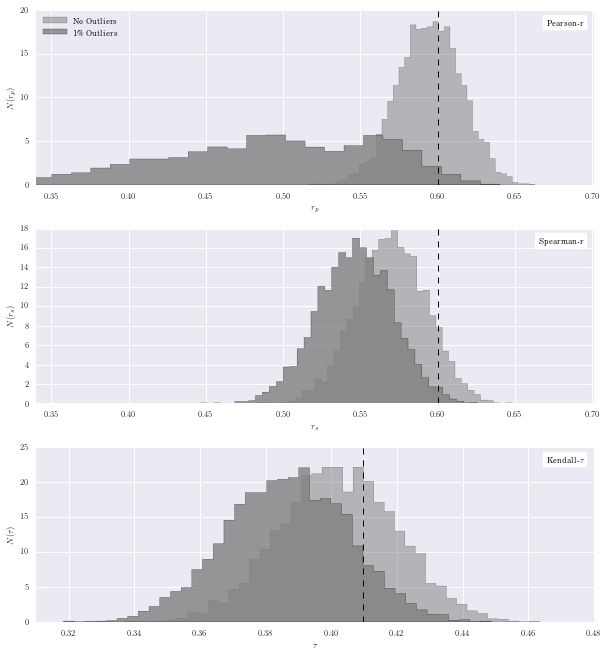

In [22]:
from astroML.stats.random import bivariate_normal
from astroML.decorators import pickle_results

# percent sign must be escaped if usetex=True
import matplotlib
if matplotlib.rcParams.get('text.usetex'):
    pct = '\%'
else:
    pct = '%'

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Set parameters for the distributions
Nbootstraps = 5000
N = 1000

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.01

#------------------------------------------------------------
# sample the distribution
# without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5,
                                      45 * np.pi / 180., int(f * N))

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)


#------------------------------------------------------------
# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
@pickle_results('fig_correlations_dump.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.pearsonr,
                                           stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j, k] = statistic(x, y)[0]

    return results

results = compute_results(N, Nbootstraps)

#------------------------------------------------------------
# Plot the results in a three-panel plot
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.25)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100), pct)))

distributions = ['Pearson-r', 'Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_p', 'r_s', r'\tau']\

for i in range(3):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 40, histtype='stepfilled', fc='gray',
                normed=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i < 2:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.701)
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.31, 0.48)
    ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes, bbox=dict(fc='w', ec='w'))

    ax.set_xlabel('$%s$' % xlabels[i])
    ax.set_ylabel('$N(%s)$' % xlabels[i])

plt.show()

## 1-D Random Number generation

generate a uniform random number and apply the inverse CDF of the distribution of the type of random variable you would like to simulate.

This example shows how to clone a disribution and compute the inverse cdf with interpolation.

KS test: D = 0.0028; p = 1


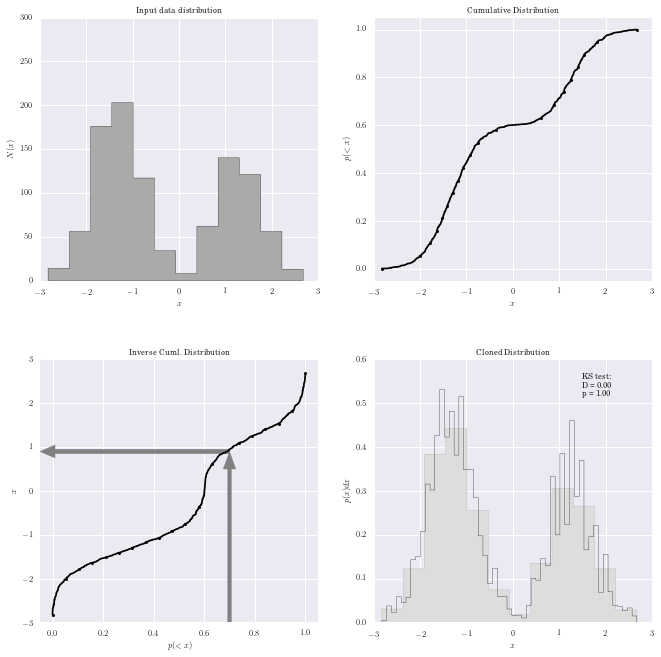

In [23]:
from scipy import stats, interpolate
from astroML.plotting import hist
from astroML.density_estimation import EmpiricalDistribution

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------å
# Create a distribution and clone it
Ndata = 1000
Nclone = 100000
np.random.seed(0)

# generate an 'observed' bimodal distribution with 10000 values
dists = (stats.norm(-1.3, 0.5), stats.norm(1.3, 0.5))
fracs = (0.6, 0.4)
x = np.hstack((d.rvs(f * Ndata) for d, f in zip(dists, fracs)))

# We can clone the distribution easily with this function
x_cloned = EmpiricalDistribution(x).rvs(Nclone)

# compute the KS test to check if they're the same
D, p = stats.ks_2samp(x, x_cloned)
print "KS test: D = %.2g; p = %.2g" % (D, p)

#------------------------------------------------------------
# For the sake of this example, we need to calculate some
#  of the partial steps used by EmpiricalDistribution

# create a cumulative distribution
x.sort()
Px_cuml = np.linspace(0, 1, Ndata)

# set up an interpolation of the inverse cumulative distribution
tck = interpolate.splrep(Px_cuml, x)

# sample evenly along the cumulative distribution, and interpolate
Px_cuml_sample = np.linspace(0, 1, 10 * Ndata)
x_sample = interpolate.splev(Px_cuml_sample, tck)

#------------------------------------------------------------
# Plot the cloned distribution and the procedure for obtaining it
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.3, left=0.1, right=0.95,
                    bottom=0.08, top=0.92)

indices = np.linspace(0, Ndata - 1, 20).astype(int)

# plot a histogram of the input
ax = fig.add_subplot(221)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_ylim(0, 300)
ax.set_title('Input data distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$N(x)$')

# plot the cumulative distribution
ax = fig.add_subplot(222)
ax.scatter(x[indices], Px_cuml[indices], lw=0, c='k', s=9)
ax.plot(x, Px_cuml, '-k')
ax.set_xlim(-3, 3)
ax.set_ylim(-0.05, 1.05)
ax.set_title('Cumulative Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(<x)$')

# plot the inverse cumulative distribution and spline fit
ax = fig.add_subplot(223)
ax.scatter(Px_cuml[indices], x[indices], lw=0, c='k', s=9)
ax.plot(Px_cuml_sample, x_sample, '-k')
ax.arrow(0.7, -3, 0, 3.5, width=0.015, fc='gray', ec='gray',
         head_width=0.05, head_length=0.4)
ax.arrow(0.7, 0.9, -0.69, 0, width=0.1, fc='gray', ec='gray',
         head_width=0.3, head_length=0.06)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-3, 3)
ax.set_title('Inverse Cuml. Distribution')
ax.set_xlabel('$p(<x)$')
ax.set_ylabel('$x$')

# plot the resulting cloned distribution
ax = fig.add_subplot(224)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', normed=True,
     ec='#AAAAAA', fc='#DDDDDD',
     label='input data')
hist(x_cloned, bins='knuth', ax=ax,
     histtype='step', normed=True,
     color='k', label='cloned data')
ax.set_title('Cloned Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)dx$')
ax.text(0.75, 0.95, "KS test:\nD = %.2f\np = %.2f" % (D, p),
        ha='left', va='top', transform=ax.transAxes)

plt.show()